# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [4]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [5]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
# Your code here
#create a function

def alpha_func(D, idx):
    cov_ = np.cov(D[['Sepal.Width', 'Sepal.Length']].loc[idx], rowvar=False)
    return ((cov_[1, 1] - cov_[0, 1]) /
            (cov_[0, 0] + cov_[1, 1] - 2 * cov_[0, 1]))

Test the code below

In [7]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [8]:
#initialize the random generator
rng = np.random.default_rng(0)

# Generate bootstrap sample indices
bootstrap_indices = rng.choice(100, 100, replace=True)

# Compute alpha for the bootstrap sample
bootstrap_alpha = alpha_func(df, bootstrap_indices)
print(f'Bootstrap Alpha: {bootstrap_alpha}')

Bootstrap Alpha: 0.6675354865158225


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

No, it is not sufficient because the mean solely gives us a single value representing the average, but it does not tell us how much it might vary if we were to take different samples from the population. It could also be influenced by outliers, leading to a biased estimate.
Bootstrapping allow us to resample the data many times and understand the variability of the mean estimate. It allows us to visualize the distribution of the mean estimates and helps us understand the skewness and outliers in the data.



_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [9]:
# Add your code here to set the seed
def boot_SE(D, B=1000, seed =0):
    rng = np.random.default_rng(seed)
    bootstrap_values = []
    n = D.shape[0]

    for i in range(B):
        idx = rng.choice(D.index, n, replace= True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)

    return np.std(np.array(bootstrap_values))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [10]:
#calculate the bootstrap standard error for alpha

sepal_length_SE = boot_SE(df)
print(f'Bootstrap SE for Alpha: {sepal_length_SE}')

Bootstrap SE for Alpha: 0.03180510076860767


_(vi)_ What is the original mean value of `Sepal.Length`?

In [11]:
# Your code here
original_mean_sepal_length = df['Sepal.Length'].mean()
print(f'Original mean sepal length: {original_mean_sepal_length}')

Original mean sepal length: 5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [12]:
# Add your code here
#Create a boot_se_samples function

def boot_se_samples(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    bootstrap_samples = []
    n = D.shape[0]

    for i in range(B):
        idx = rng.choice(D.index, n, replace=True)
        sample_mean = D.loc[idx, 'Sepal.Length'].mean()
        bootstrap_samples.append(sample_mean)

    return np.array(bootstrap_samples)


In [13]:
# Perform bootstrapping to get the bootstrap samples of Sepal.Length
bootstrapped_samples = boot_se_samples(df)

In [14]:
#calculate bootstrap mean and std. dev
bootstrapped_mean = np.mean(bootstrapped_samples)
bootstrapped_std = np.std(bootstrapped_samples)

In [16]:
#compare with the original mean
original_mean = df['Sepal.Length'].mean()

#calculate the bootstrapped range
t_range = np.ptp(bootstrapped_samples)

print(f'Original Mean Sepal length:{original_mean:.4f}')

Original Mean Sepal length:5.8433


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [18]:
#calculate the 95% confidence interval (2.5th and 97.5th percentiles)

confidence_interval = np.percentile(bootstrapped_samples, [2.5,97.5])

print(f'95% Confidence interval: [{confidence_interval[0]:.4f},{confidence_interval[1]:.4f}]')
print(f'Bootstrapped Mean Sepal Length: {bootstrapped_mean:.4f}')

95% Confidence interval: [5.7186,5.9747]
Bootstrapped Mean Sepal Length: 5.8423


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

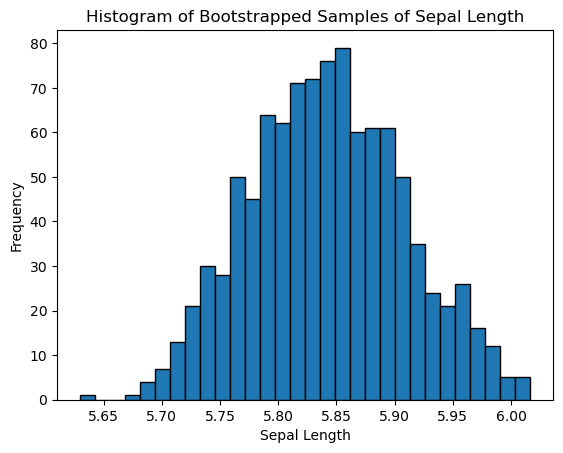

In [19]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(bootstrapped_samples, bins = 30, edgecolor = 'black')

# Add a title
ax.set_title('Histogram of Bootstrapped Samples of Sepal Length')

# Add a label to the x-axis
ax.set_xlabel('Sepal Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here

Based on the historgram, the mean sepal length of iris flowers is around 5.85 units. The 95% confidence interval for the mean sepal length [5.7186,5.9747] indicates that we are quite confident about this estimate.
With a 95% confidence interval, the shipping company can be confident that the true mean of the sepal length falls within the specified range. The shipping company should allocate space in the shipping containers based on an average sepal length of 5.85 units.
The company should also recognize that there may be a variability so it should also account for that in the space allocation.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
